In [1]:
import requests

In [ ]:
# api 테스트 용도
api_key = ''
url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/2014/02'

json = requests.get(url).json()
json

{'energyUseDataSummaryInfo': {'list_total_count': 7,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'YEAR': '2014',
    'MON': '02',
    'MM_TYPE': '공동주택관리소',
    'CNT': '1637',
    'EUS': '304985724',
    'EUS1': '318373604',
    'EUS2': '329663003',
    'ECO2_1': '-19032579.5',
    'ECO2_2': '-8069813.708',
    'GUS': '19710915',
    'GUS1': '22430455',
    'GUS2': '22386030',
    'GCO2_1': '-2697327.5',
    'GCO2_2': '-6042013.6',
    'WUS': '43',
    'WUS1': '30',
    'WUS2': '38',
    'WCO2_1': '9',
    'WCO2_2': '2.988',
    'HUS': '0',
    'HUS1': '0',
    'HUS2': '0',
    'HCO2_1': '0',
    'HCO2_2': '0',
    'REG_DATE': '2015-06-05 10:53:28.0'},
   {'YEAR': '2014',
    'MON': '02',
    'MM_TYPE': '공공기관',
    'CNT': '2729',
    'EUS': '238008473',
    'EUS1': '248860700',
    'EUS2': '260821162',
    'ECO2_1': '-16832458',
    'ECO2_2': '-7136962.192',
    'GUS': '10098100',
    'GUS1': '13311180',
    'GUS2': '12239024',
    'GCO2_1': '-2677002',
    'GC

In [16]:
import requests
import json

personal_data_results = []

for year in range(2014, 2025):
    for month in range(1, 13):
        formatted_month = str(month).zfill(2)
        
        url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{formatted_month}'
        
        response = requests.get(url)
        json_data = response.json()

        rows = json_data.get('energyUseDataSummaryInfo', {}).get('row', [])

        for item in rows:
            if item.get('MM_TYPE') == '개인':
                keys_to_extract = ['YEAR', 'MON', 'EUS', 'GUS', 'WUS', 'HUS']
                filtered_item = {key: item.get(key) for key in keys_to_extract}
                personal_data_results.append(filtered_item)
                break 

print(json.dumps(personal_data_results, indent=2, ensure_ascii=False))

[
  {
    "YEAR": "2014",
    "MON": "01",
    "EUS": "144900337",
    "GUS": "38335224",
    "WUS": "10613959.838",
    "HUS": "17632536.939"
  },
  {
    "YEAR": "2014",
    "MON": "03",
    "EUS": "135419507",
    "GUS": "32209021",
    "WUS": "11069450.17",
    "HUS": "10470340.034"
  },
  {
    "YEAR": "2014",
    "MON": "07",
    "EUS": "168681507",
    "GUS": "7318863",
    "WUS": "13135941.064",
    "HUS": "217853.383"
  },
  {
    "YEAR": "2014",
    "MON": "08",
    "EUS": "187725750",
    "GUS": "6596679",
    "WUS": "14031651.912",
    "HUS": "320553.853"
  },
  {
    "YEAR": "2014",
    "MON": "09",
    "EUS": "175409826",
    "GUS": "6969566",
    "WUS": "13830683.654",
    "HUS": "1041887.78"
  },
  {
    "YEAR": "2014",
    "MON": "11",
    "EUS": "173263842",
    "GUS": "19773109",
    "WUS": "13489886.752",
    "HUS": "10420879.095"
  },
  {
    "YEAR": "2014",
    "MON": "12",
    "EUS": "180540444",
    "GUS": "39598422",
    "WUS": "13028824.456",
    "HUS": "24632

In [18]:
import pandas as pd

df = pd.DataFrame(personal_data_results)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YEAR    90 non-null     object
 1   MON     90 non-null     object
 2   EUS     90 non-null     object
 3   GUS     90 non-null     object
 4   WUS     90 non-null     object
 5   HUS     90 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [19]:
df['MON'] = df['MON'].astype(int)

def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

df['SEASON'] = df['MON'].apply(get_season)
df

,YEAR,MON,EUS,GUS,WUS,HUS,SEASON
0,2014,1,144900337,38335224,10613959.838,17632536.939,겨울
1,2014,3,135419507,32209021,11069450.17,10470340.034,봄
2,2014,7,168681507,7318863,13135941.064,217853.383,여름
3,2014,8,187725750,6596679,14031651.912,320553.853,여름
4,2014,9,175409826,6969566,13830683.654,1041887.78,가을
...,...,...,...,...,...,...,...
85,2024,8,463971328,7072251,15873544.6,130082.263,여름
86,2024,9,409872908,5729131,15143321.6,3420507.136,가을
87,2024,10,282268119,8233421,15297669.9,2695491.396,가을
88,2024,11,257927956,17418221,14678672.5,8836296.454,가을


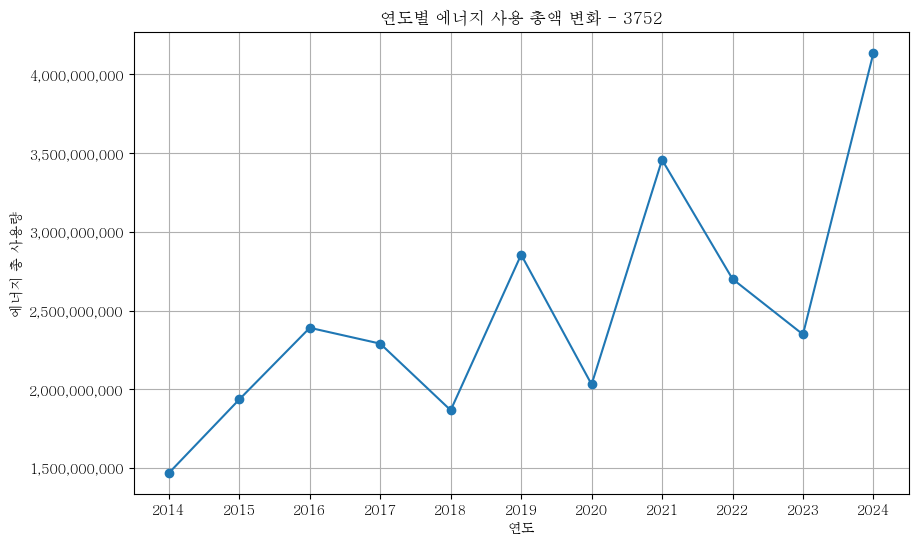

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from matplotlib.ticker import FuncFormatter

# 한국어 폰트 설정
font_path = 'C:\\Windows\\Fonts\\batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

numeric_cols = ['EUS', 'GUS', 'WUS', 'HUS']

# 데이터 타입을 숫자로 변환
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
plt.rcParams['axes.unicode_minus'] = False

df['TOTAL_USAGE'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
yearly_usage = df.groupby('YEAR')['TOTAL_USAGE'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(yearly_usage.index, yearly_usage.values, marker='o', linestyle='-')

ax.set_title('연도별 에너지 사용 총액 변화 - 3752')
ax.set_xlabel('연도')
ax.set_ylabel('에너지 총 사용량')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.grid(True)
ax.set_xticks(yearly_usage.index)
plt.show()

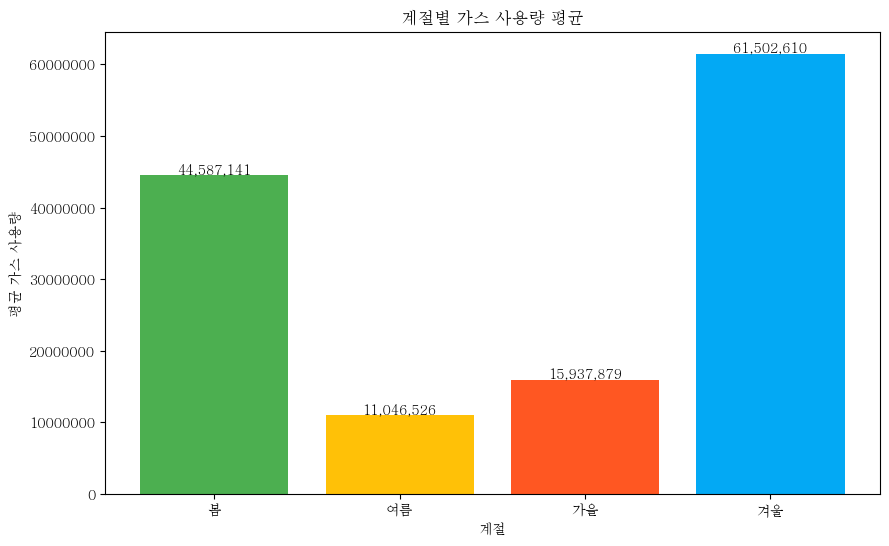

In [33]:
seasonal_gas_avg = df.groupby('SEASON')['GUS'].mean().reindex(['봄', '여름', '가을', '겨울'])

plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_gas_avg.index, seasonal_gas_avg.values, color=['#4CAF50', '#FFC107', '#FF5722', '#03A9F4'])
plt.title('계절별 가스 사용량 평균')
plt.xlabel('계절')
plt.ylabel('평균 가스 사용량')
plt.ticklabel_format(style='plain', axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center')

plt.show()